In [2]:
import pandas as pd
import numpy as np
from benchmarks import *
import glob
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR /usr/WS2/bolet1/ruby-benchmarks/exploreHyperparams


In [3]:
# for each of the programs/prob sizes in the explorData directory,
# load up all their CSV data

os.chdir(ROOT_DIR+'/explorData')

# extract the names and problem sizes of the done codes
dirs = list(os.listdir())

dirs.sort()

doneRuns = {}

for dir in dirs:
	progname = dir.split('-')[0]
	probsize = dir.split('-')[1]

	allJobs = glob.glob('./'+dir+'/allUniquePointsToSample.csv')[0]
	doneFiles = glob.glob('./'+dir+'/*/complete.csv')

	allData = pd.read_csv(allJobs)

	#doneData = pd.DataFrame(columns=['xtime']+list(allData.columns))
	doneData = pd.DataFrame()

	tojoin = []
	# join all the done files into one csv
	for doneFile in doneFiles:
		comp = pd.read_csv(doneFile)
		tojoin += [comp]
	
	doneData = pd.concat([doneData]+tojoin, ignore_index=True)

	doneData = doneData.reset_index(drop=True)
	
	#print(doneData.shape, doneData.dtypes, sep='\n')

	# we remove this line just to get the plots up
	doneData = doneData[doneData['xtime'] != -1.0]

	# if we have all the data, let's analyze it
	if doneData.shape[0] == allData.shape[0]:
		print(progname, probsize, end='\t')
		print(doneData.shape, allData.shape, 'all samples collected!')
		doneRuns[dir] = {'progname':progname, 'probsize': probsize, 'df':doneData}
	else:
		print('\t', progname, probsize, end='\t')
		print('incomplete data! Collected', doneData.shape[0], '/', allData.shape[0], 'samples')





bt_nas lrgprob	(4500, 7) (4500, 6) all samples collected!
bt_nas medprob	(4500, 7) (4500, 6) all samples collected!
bt_nas smlprob	(4500, 7) (4500, 6) all samples collected!
cfd_rodinia lrgprob	(4500, 7) (4500, 6) all samples collected!
cfd_rodinia medprob	(4500, 7) (4500, 6) all samples collected!
cfd_rodinia smlprob	(4500, 7) (4500, 6) all samples collected!
cg_nas lrgprob	(4500, 7) (4500, 6) all samples collected!
cg_nas medprob	(4500, 7) (4500, 6) all samples collected!
cg_nas smlprob	(4500, 7) (4500, 6) all samples collected!
ft_nas lrgprob	(4500, 7) (4500, 6) all samples collected!
ft_nas medprob	(4500, 7) (4500, 6) all samples collected!
ft_nas smlprob	(4500, 7) (4500, 6) all samples collected!
hpcg lrgprob	(4500, 7) (4500, 6) all samples collected!
hpcg medprob	(4500, 7) (4500, 6) all samples collected!
hpcg smlprob	(4500, 7) (4500, 6) all samples collected!
lulesh lrgprob	(4500, 7) (4500, 6) all samples collected!
lulesh medprob	(4500, 7) (4500, 6) all samples collected!
lules

bt_nas lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
0               56        spread      cores       static  745.260000
1               56        spread      cores    dynamic,1  745.540000
2               56        spread    sockets       static  747.530000
3               56        spread    sockets     static,8  756.176667
4               56        spread    threads    dynamic,1  761.953333
5               56         close      cores       static  763.673333
6               56        spread      cores     static,1  768.010000
7               56         close    sockets     guided,1  768.336667
8               56         close    sockets       static  768.596667
9               56         close      cores     guided,4  768.713333
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE   xtime
1490                8        spread      cores  dynamic,256  4500.0
1491                8        spread      cores  dynamic,128  4500

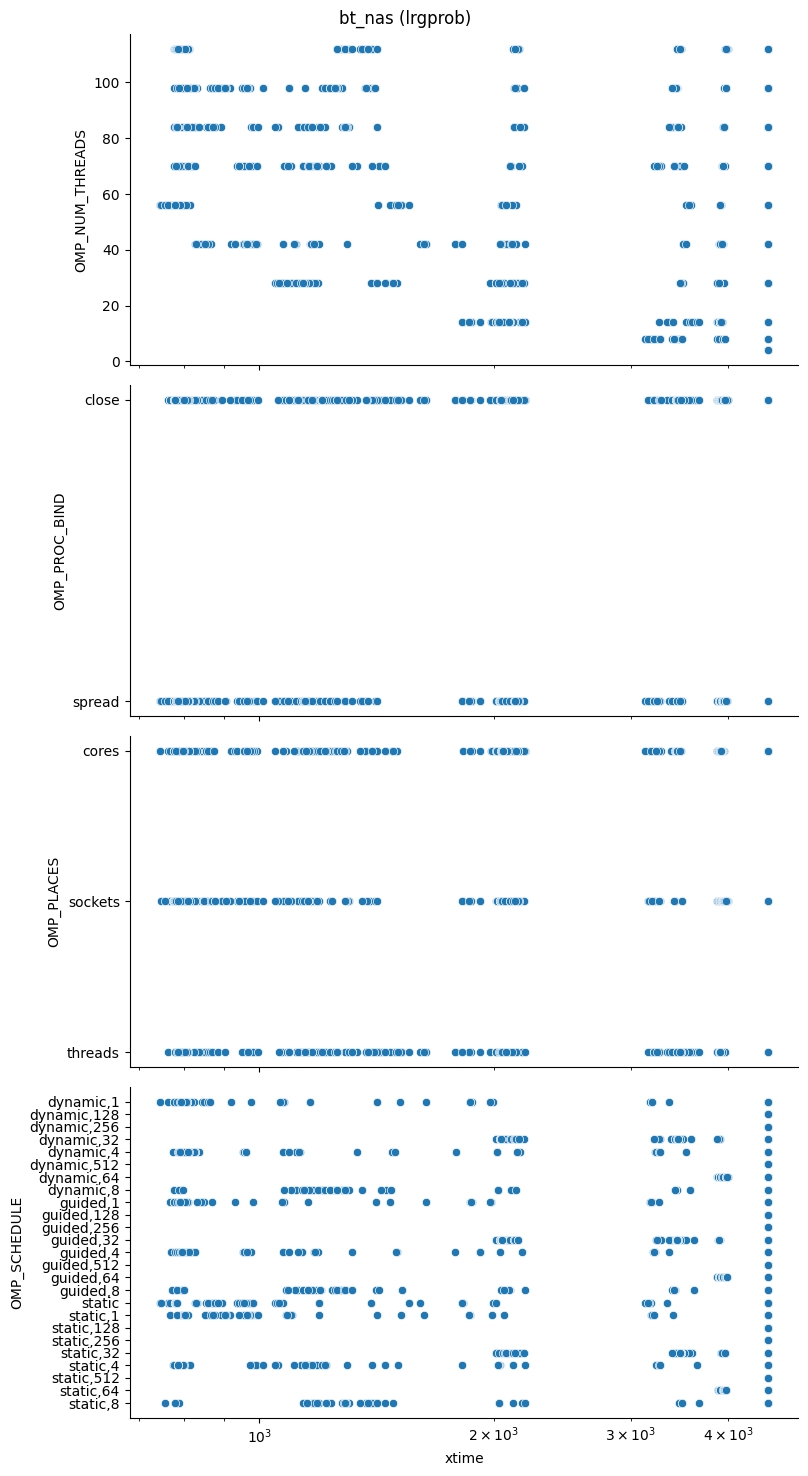

bt_nas medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               56         close      cores       static  31.943333
1               56        spread    threads       static  31.986667
2               56         close    sockets       static  31.993333
3               56        spread    sockets    dynamic,1  32.010000
4               56        spread      cores     guided,1  32.080000
5               56        spread    sockets       static  32.153333
6               56        spread    sockets     guided,1  32.360000
7               56         close    sockets     guided,1  32.480000
8               56         close      cores    dynamic,1  32.510000
9               56        spread      cores       static  32.553333
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1490               70         close    threads   guided,512  900.0
1491                8         close    threads  dynamic,256  900.0
1492       

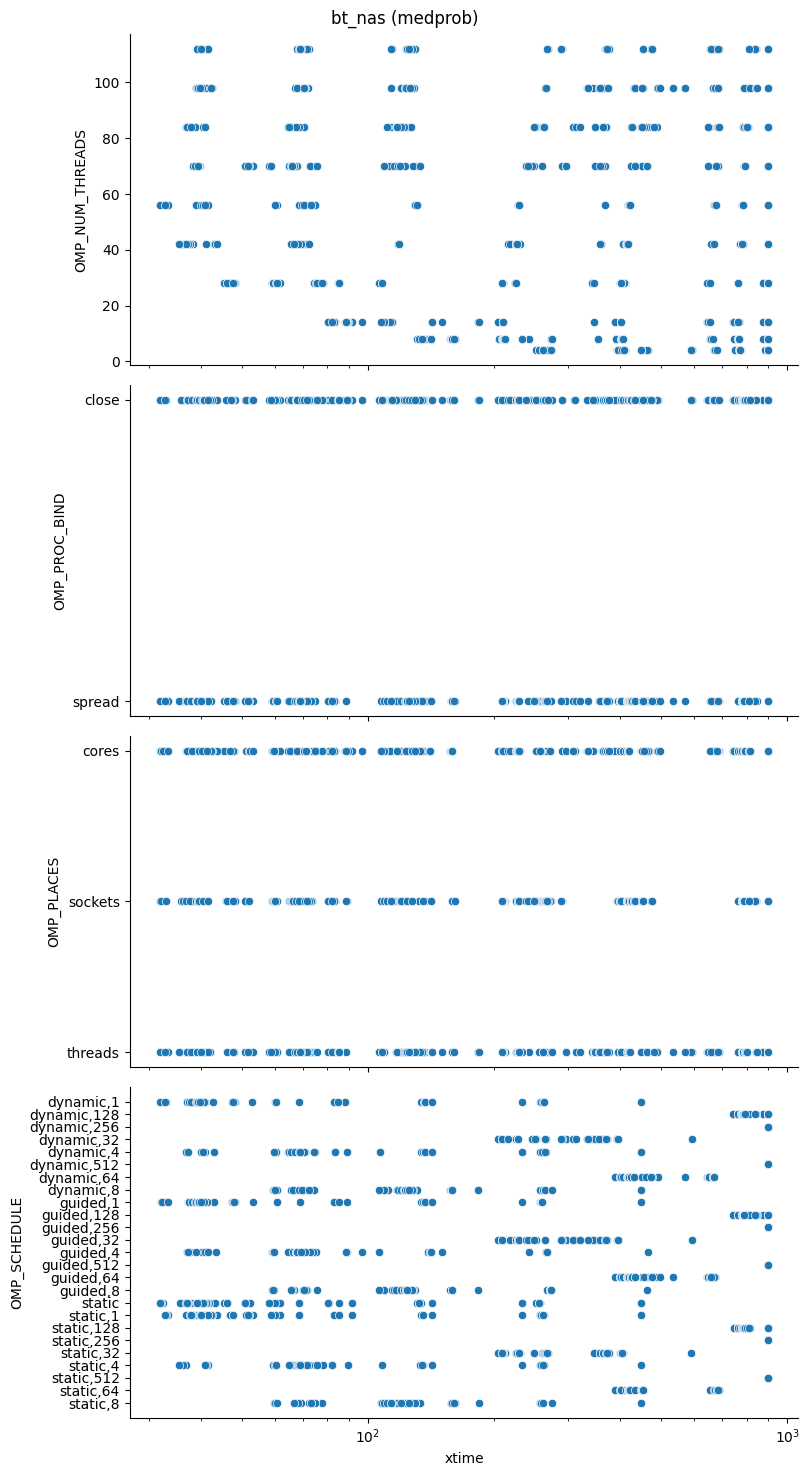

bt_nas smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              112         close      cores     static,1  7.383333
1               56         close      cores       static  7.446667
2              112         close      cores       static  7.460000
3              112        spread      cores     static,1  7.493333
4              112        spread      cores       static  7.500000
5              112         close    sockets     static,1  7.533333
6              112         close    sockets       static  7.536667
7              112         close      cores    dynamic,1  7.580000
8               56         close      cores    dynamic,1  7.583333
9               56         close      cores     static,1  7.593333
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1490                8        spread    threads    guided,64  100.0
1491                8        spread    threads   guided,512  100.0
1492               56 

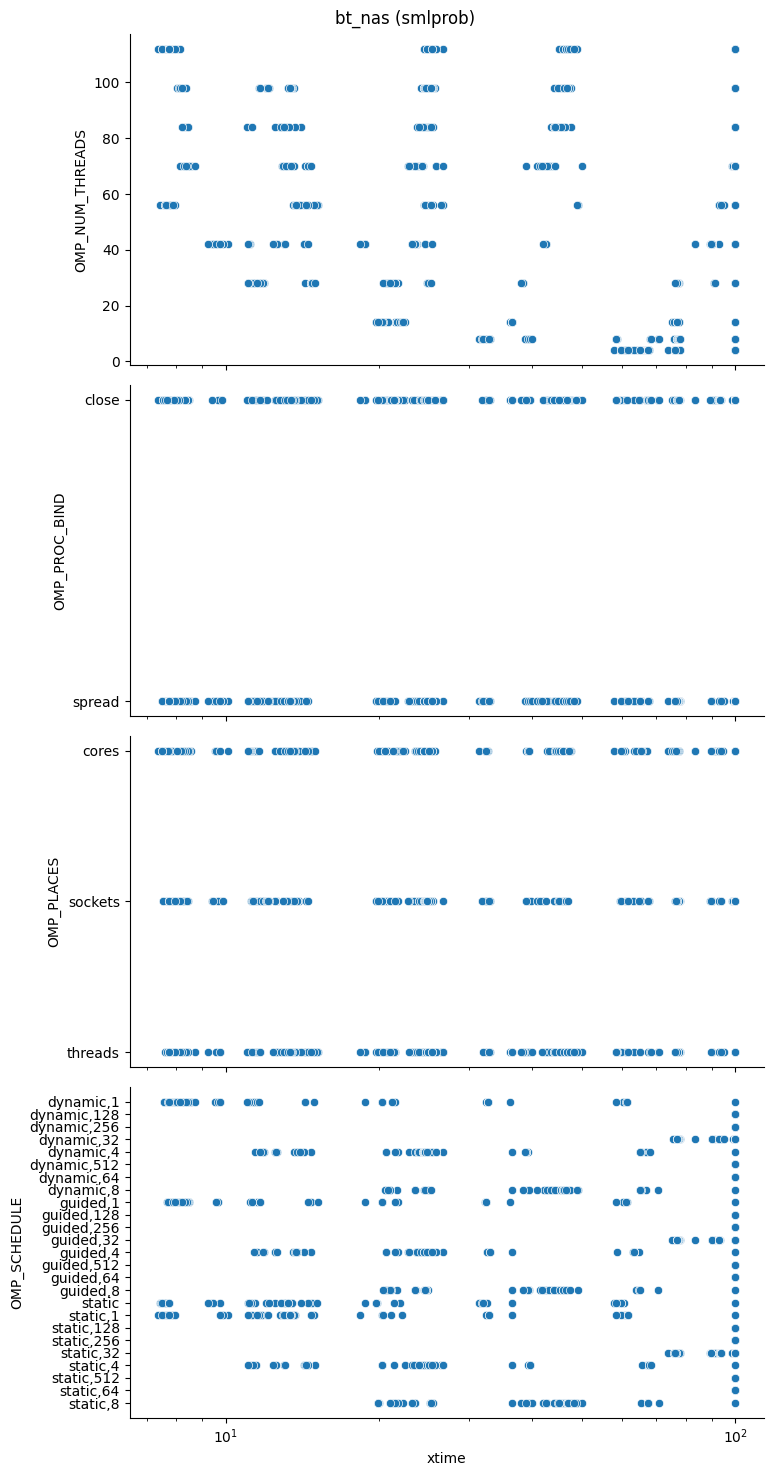

cfd_rodinia lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              112         close    threads       static  9.222637
1              112         close      cores       static  9.236590
2              112        spread    threads       static  9.238283
3              112        spread      cores       static  9.262327
4               56         close      cores       static  9.301790
5              112         close    sockets       static  9.351023
6              112        spread    sockets       static  9.355367
7               56        spread    threads       static  9.466550
8               56        spread      cores       static  9.558880
9              112        spread      cores    static,64  9.582537
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1490               14         close    sockets    dynamic,1  405.987667
1491                4         close      cores    dynamic,1  420.414000
14

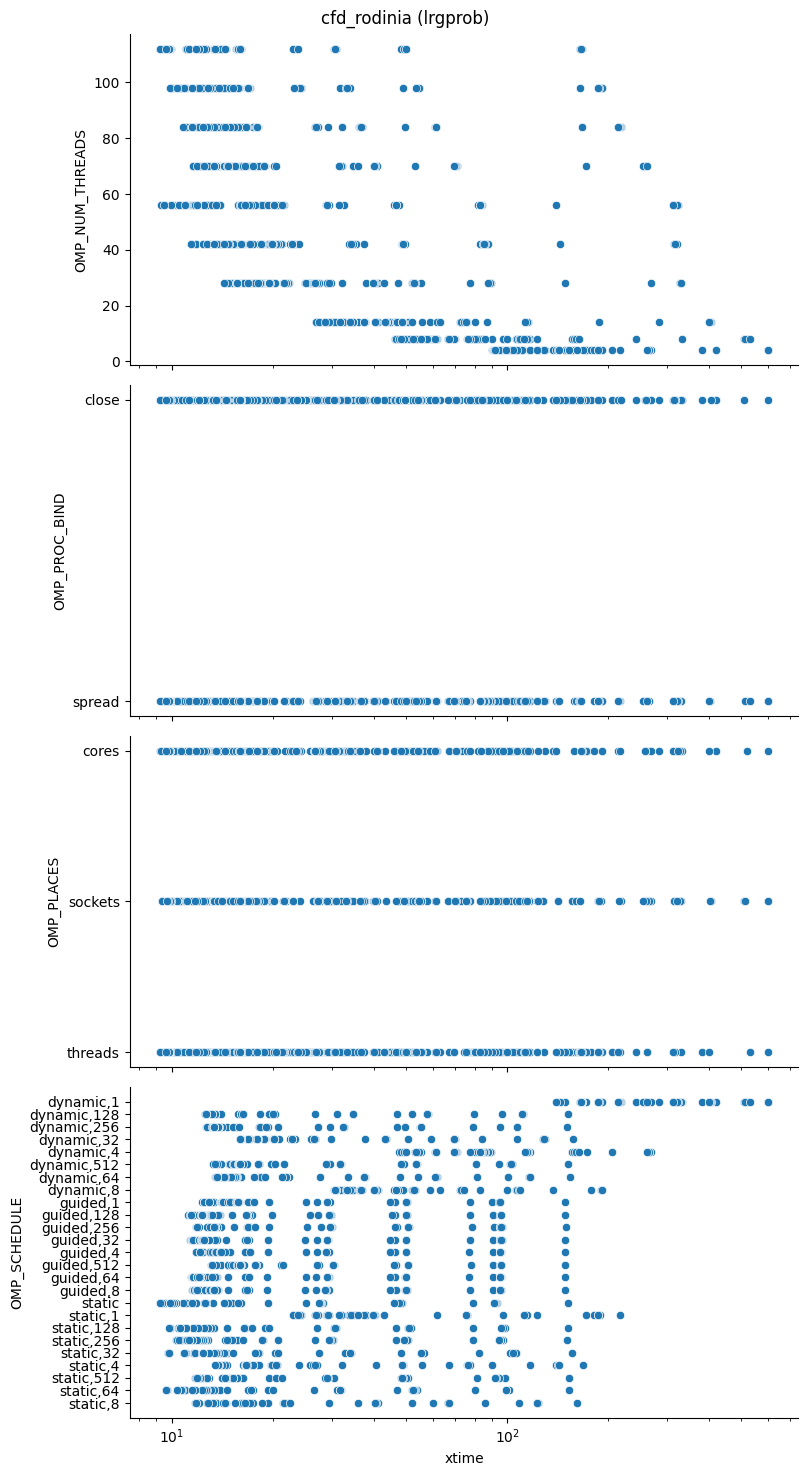

cfd_rodinia medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              112        spread    threads       static  4.186460
1              112         close    threads       static  4.187167
2               56        spread    threads       static  4.202883
3              112         close      cores       static  4.208907
4              112        spread      cores       static  4.216453
5               56        spread      cores       static  4.235617
6              112         close    sockets       static  4.349003
7              112        spread    sockets       static  4.382963
8               56         close      cores       static  4.388593
9               56        spread    sockets       static  4.447100
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1490                4        spread    threads    dynamic,1  180.0
1491                8         close    sockets    dynamic,1  180.0
1492             

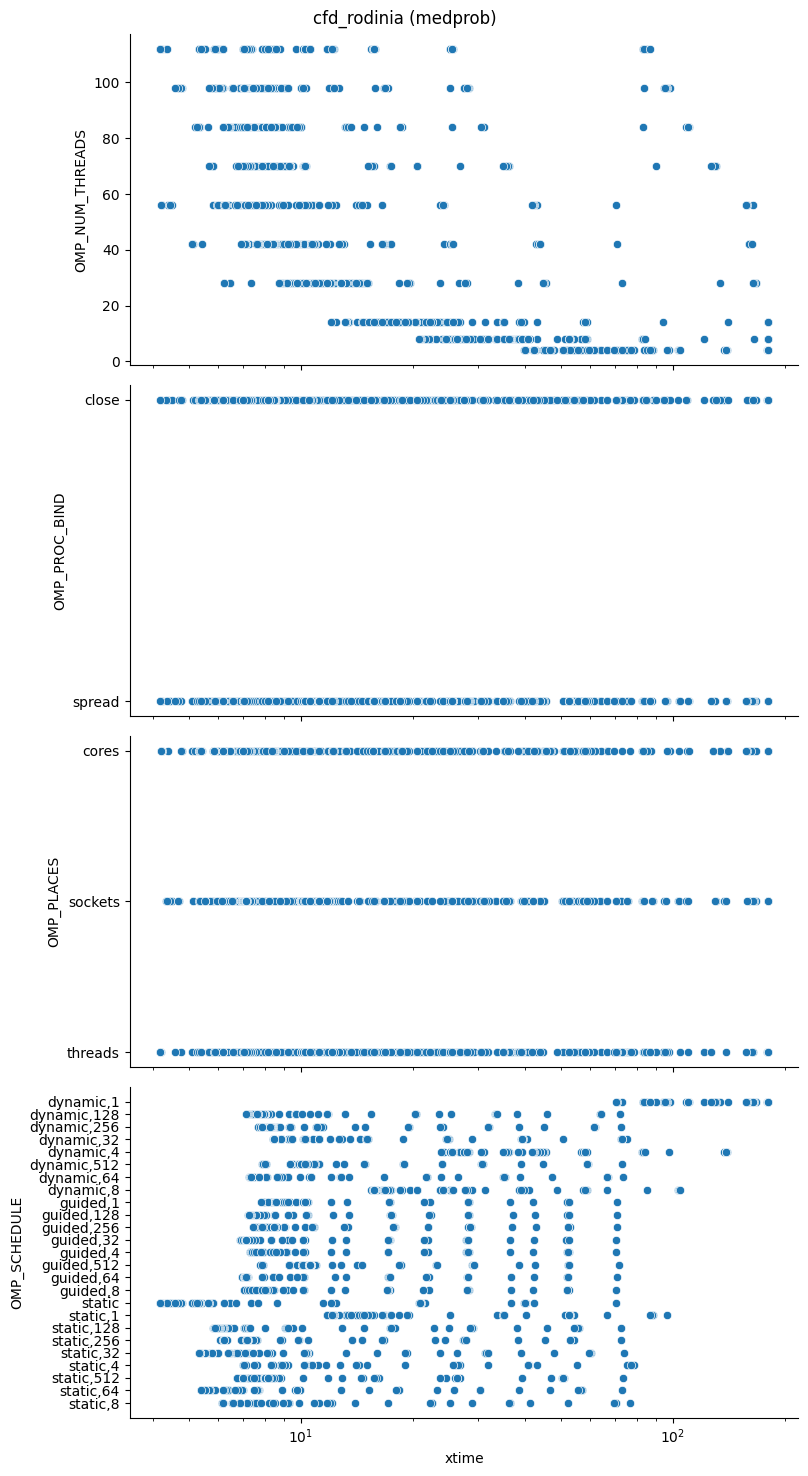

cfd_rodinia smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              112        spread    threads       static  1.578907
1              112         close    threads       static  1.607433
2              112         close      cores       static  1.616223
3              112        spread      cores       static  1.616493
4               98         close    threads       static  1.738013
5              112         close    sockets       static  1.756753
6              112        spread    sockets       static  1.757430
7               98        spread    threads       static  1.766533
8               98        spread    threads   static,128  1.769957
9               98         close      cores       static  1.775053
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1490                4         close      cores    dynamic,1   83.812667
1491               14        spread      cores    dynamic,1   84.040933
14

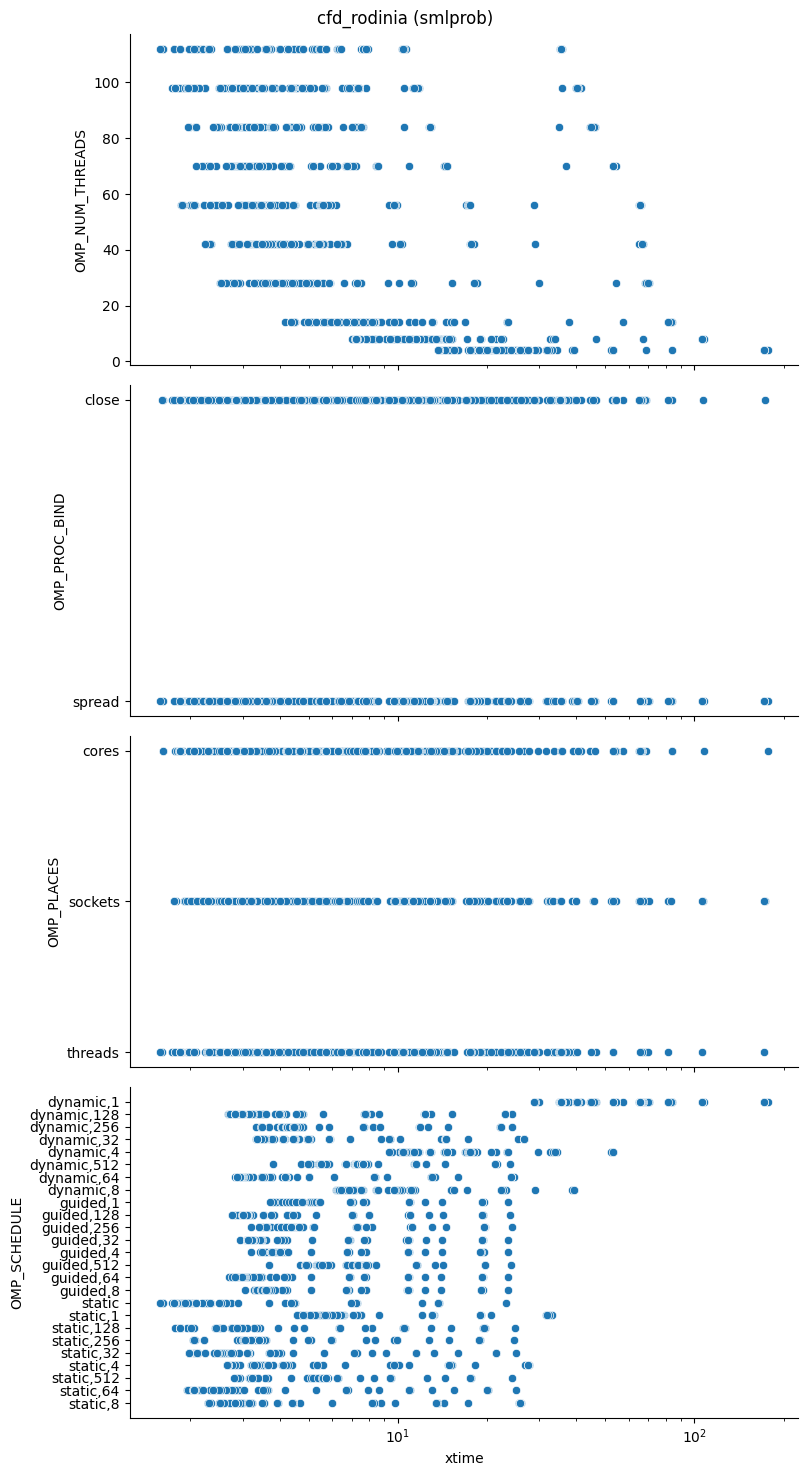

cg_nas lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
0              112         close      cores       static  176.373333
1              112         close    threads       static  176.663333
2              112        spread      cores       static  176.723333
3              112        spread    sockets       static  176.730000
4              112        spread      cores   static,128  177.073333
5              112         close      cores    static,64  177.246667
6              112        spread    threads       static  177.410000
7              112        spread    sockets    static,64  177.450000
8              112        spread    threads   static,128  177.493333
9              112        spread      cores   static,256  177.823333
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE   xtime
1490                4         close    threads   dynamic,64  3600.0
1491                4         close    threads    dynamic,8  3600

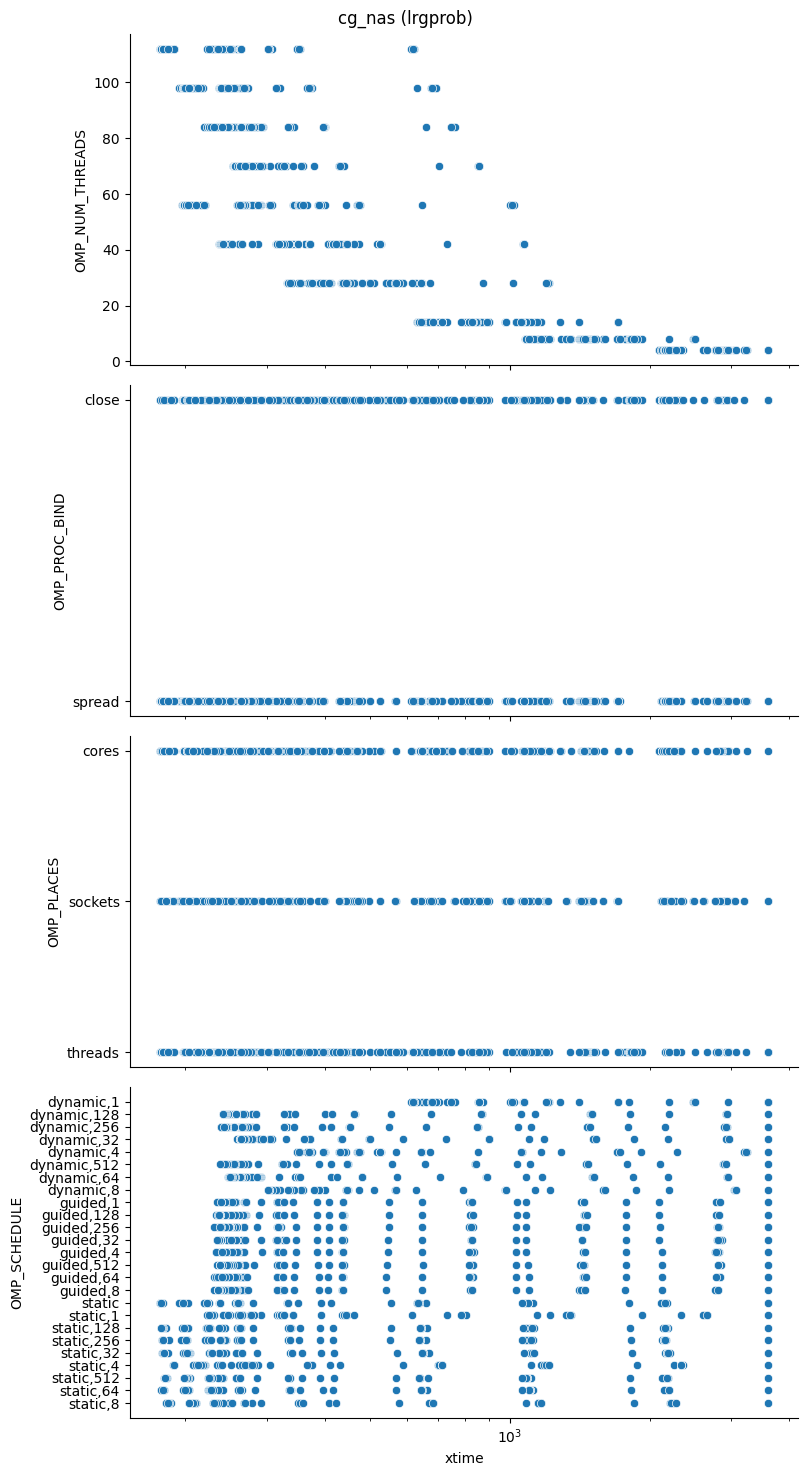

cg_nas medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              112        spread      cores       static  4.796667
1              112        spread    threads       static  4.876667
2              112         close    sockets       static  4.930000
3              112        spread    sockets    static,32  4.933333
4              112         close      cores    static,32  4.956667
5              112         close    threads    static,32  4.966667
6              112         close    threads       static  5.083333
7              112        spread      cores    static,32  5.100000
8              112        spread    sockets       static  5.113333
9              112         close    sockets    static,32  5.136667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1490                4         close      cores    dynamic,1  118.513333
1491                8         close    sockets    dynamic,1  121.320000
1492   

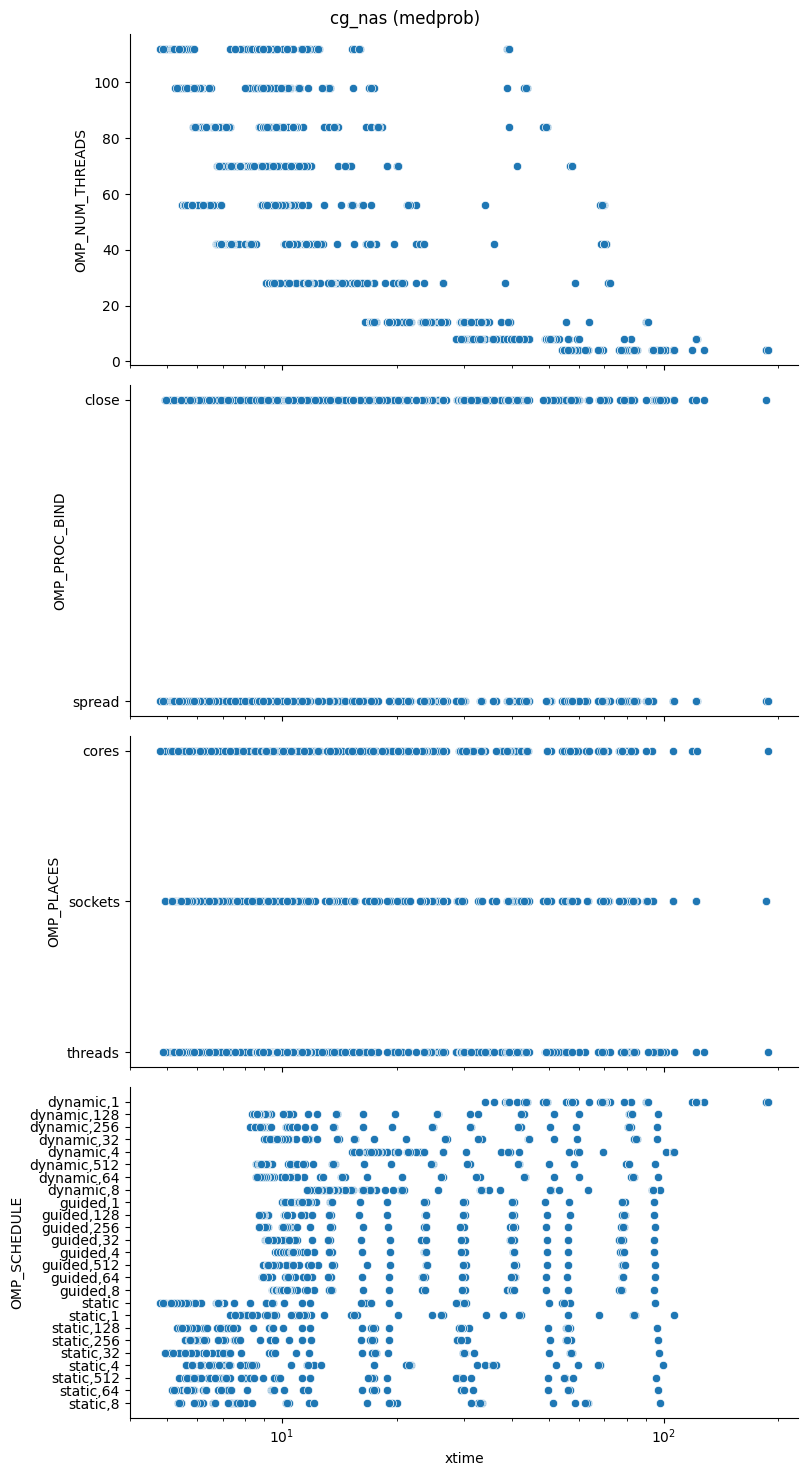

cg_nas smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              112        spread    threads       static  1.143333
1              112         close      cores       static  1.153333
2              112        spread    sockets       static  1.156667
3              112         close    threads       static  1.166667
4               98        spread    sockets       static  1.183333
5               98         close    sockets       static  1.190000
6               56        spread    threads       static  1.193333
7               56         close      cores       static  1.200000
8               56        spread      cores       static  1.213333
9              112        spread      cores       static  1.230000
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1490               14        spread    threads    dynamic,1  42.670000
1491                4         close      cores    dynamic,1  50.400000
1492      

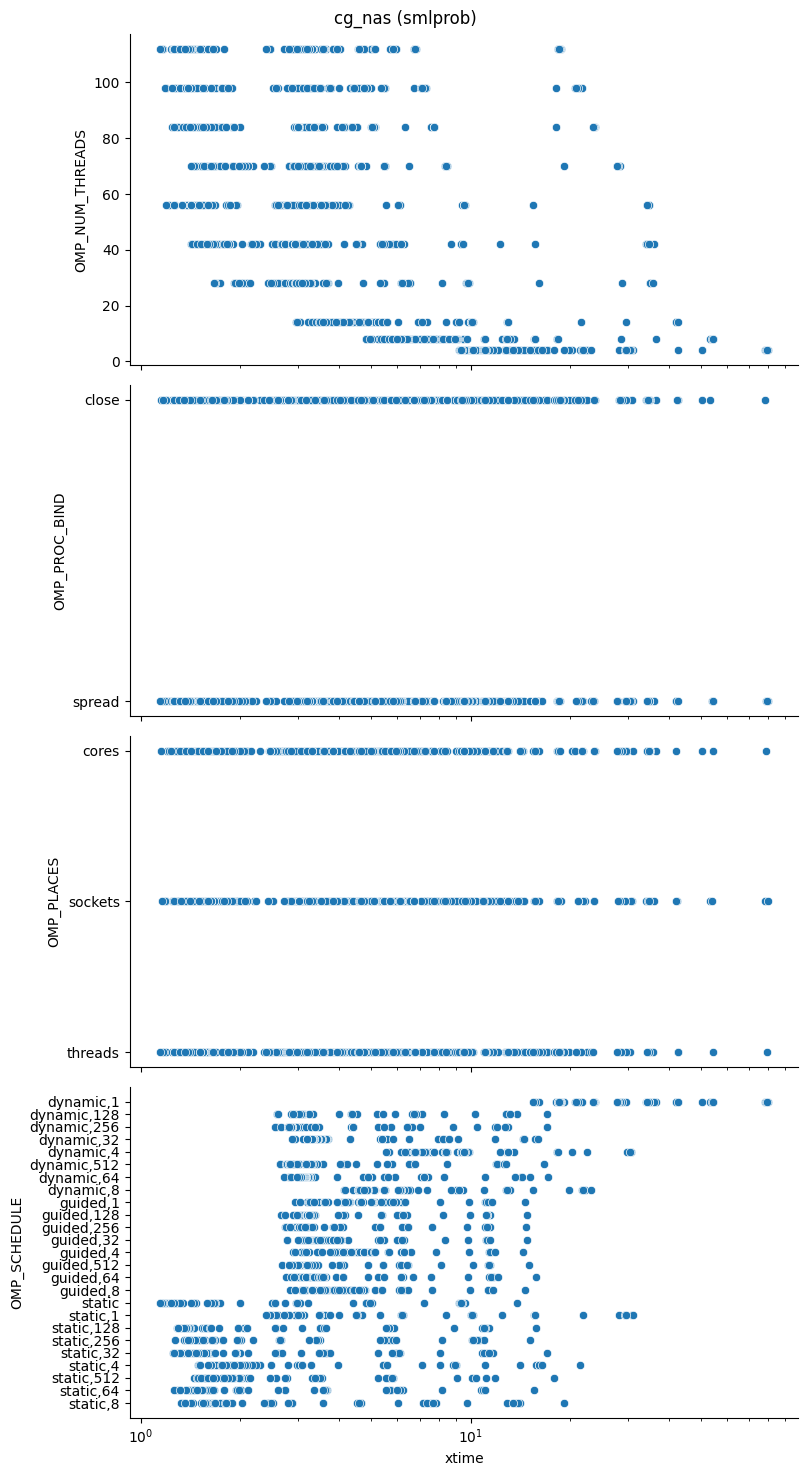

ft_nas lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
0               42        spread      cores       static  138.460000
1               42        spread      cores     static,1  138.906667
2               42         close    sockets       static  139.186667
3               42         close    sockets     static,1  139.320000
4               42        spread    threads     static,1  140.423333
5               42        spread    threads       static  141.483333
6               42        spread    sockets     static,1  142.330000
7               42        spread    sockets       static  143.556667
8               42        spread    sockets     static,4  149.790000
9               42         close    sockets     static,4  149.906667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE   xtime
1490               98         close    sockets   guided,512  1800.0
1491                4        spread    sockets  dynamic,512  1800

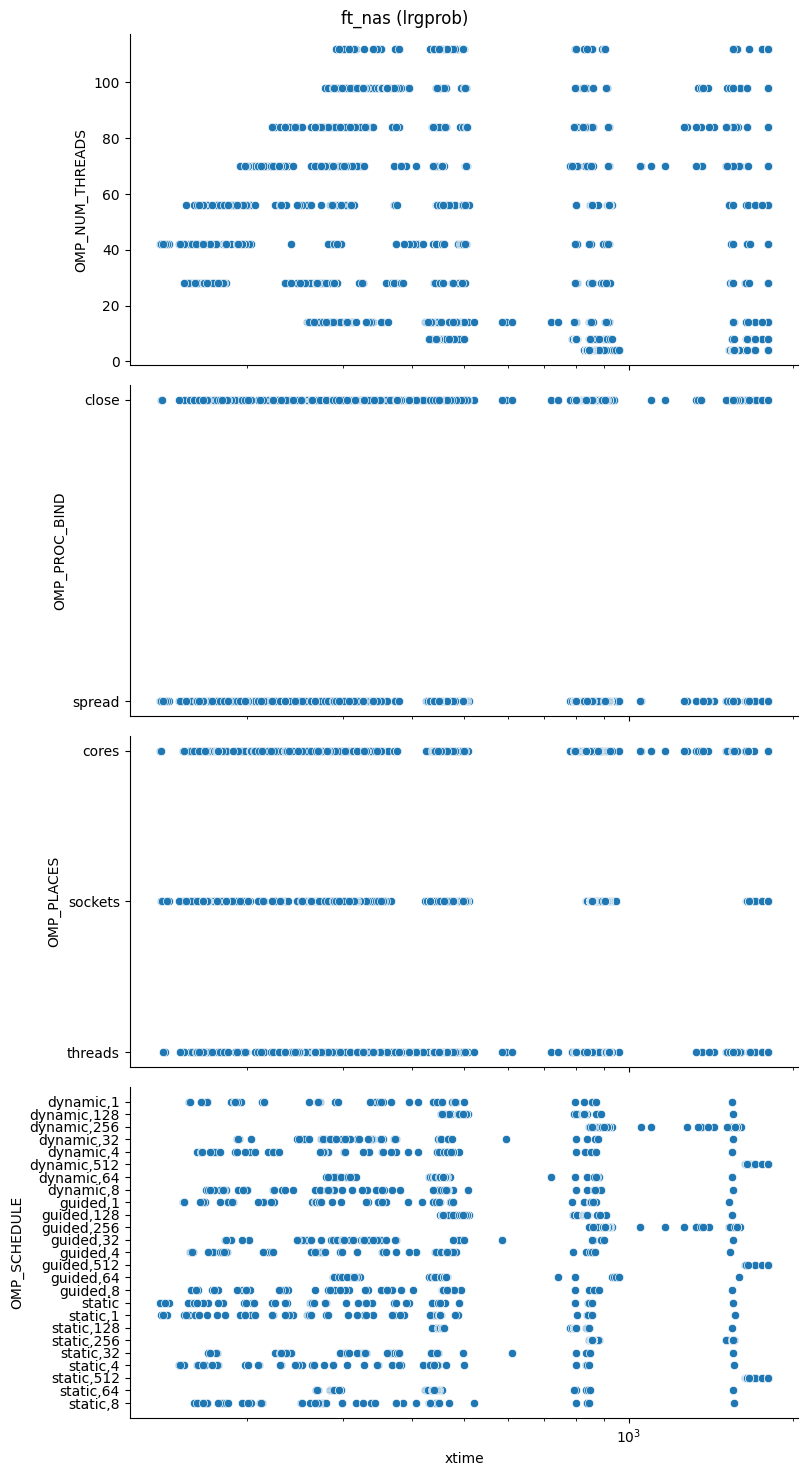

ft_nas medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0               56        spread      cores       static  3.903333
1               56        spread    threads       static  3.913333
2               56         close    sockets       static  3.926667
3               56        spread    sockets       static  3.956667
4               56         close      cores       static  3.963333
5               56        spread      cores     static,1  4.050000
6               56        spread    threads     static,1  4.056667
7               56        spread    sockets     static,1  4.080000
8               56         close    sockets     static,1  4.086667
9               56         close      cores     static,1  4.136667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1490               70         close      cores   guided,512  122.593333
1491               84        spread      cores   guided,512  122.970000
1492   

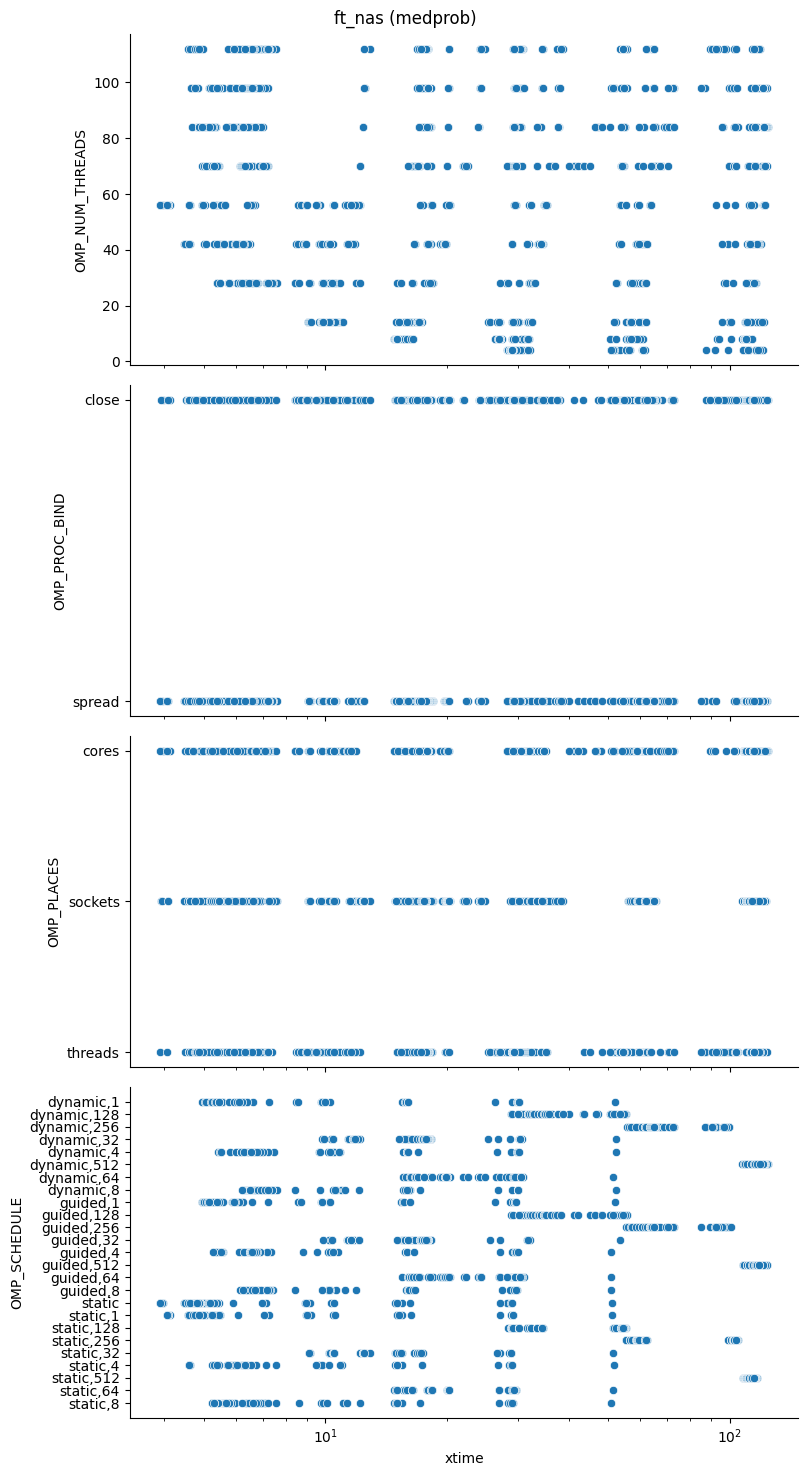

ft_nas smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0               56        spread      cores       static  0.940000
1               56         close      cores       static  0.946667
2               56        spread      cores     static,1  0.950000
3               56         close      cores     static,1  0.953333
4               56        spread    threads       static  0.960000
5               56        spread    threads     static,1  0.970000
6               56        spread    sockets       static  0.983333
7               56         close    sockets       static  1.003333
8               56         close    sockets     static,1  1.003333
9               56        spread    sockets     static,1  1.003333
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1490               98        spread    threads   guided,512  31.220000
1491               84        spread    threads  dynamic,256  31.223333
1492      

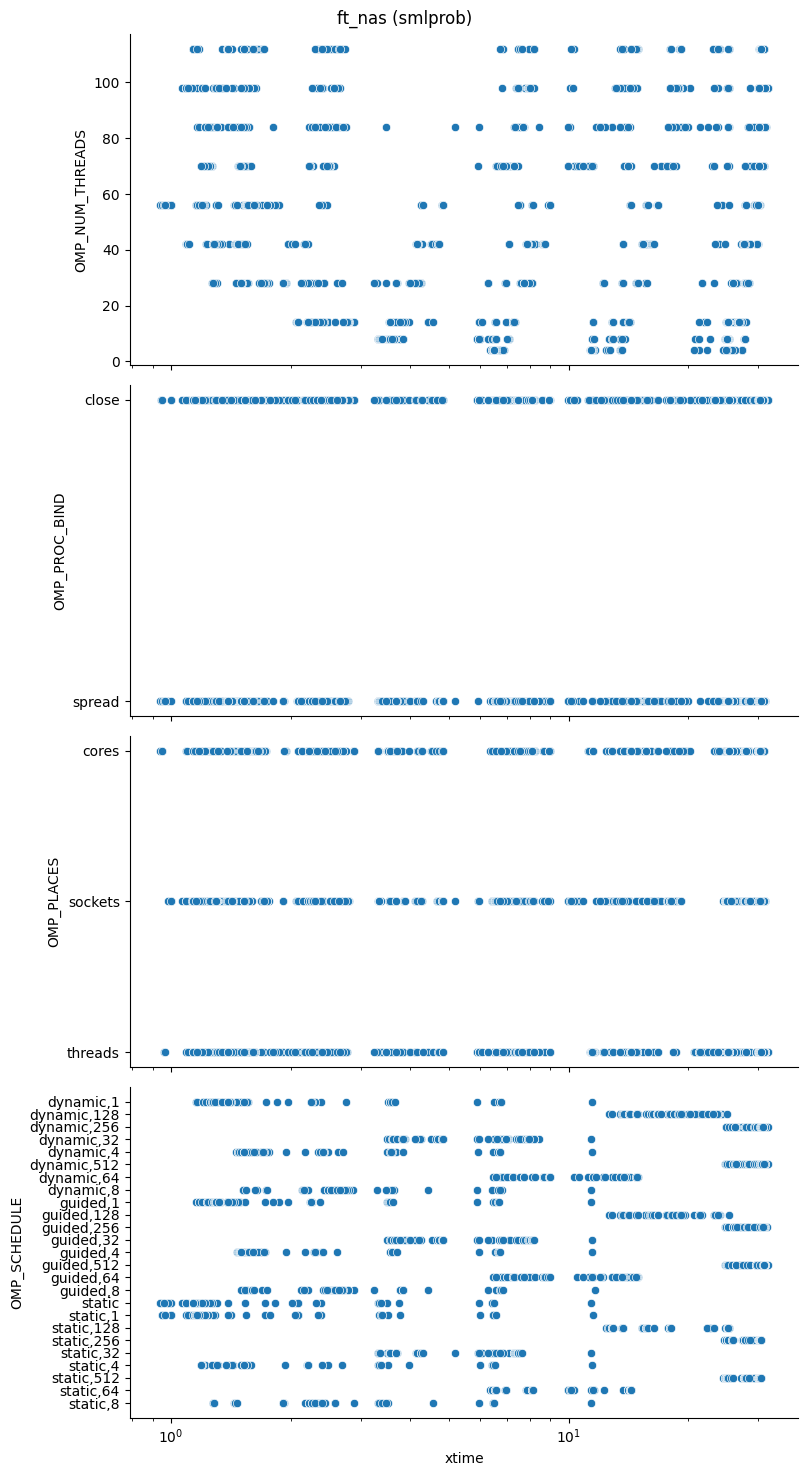

hpcg lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0                8         close      cores       static  65.220033
1               28         close      cores   static,256  65.328700
2               28         close      cores   static,128  65.428200
3                8         close      cores     guided,8  65.598200
4               28         close      cores    static,32  65.687567
5               28         close      cores    static,64  66.016567
6                8         close      cores   static,256  66.516267
7               28         close      cores   static,512  66.576033
8                8         close      cores    guided,64  66.765000
9                8         close      cores   static,128  66.931033
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1490                4        spread      cores    dynamic,1  600.0
1491               28        spread      cores    dynamic,1  600.0
1492         

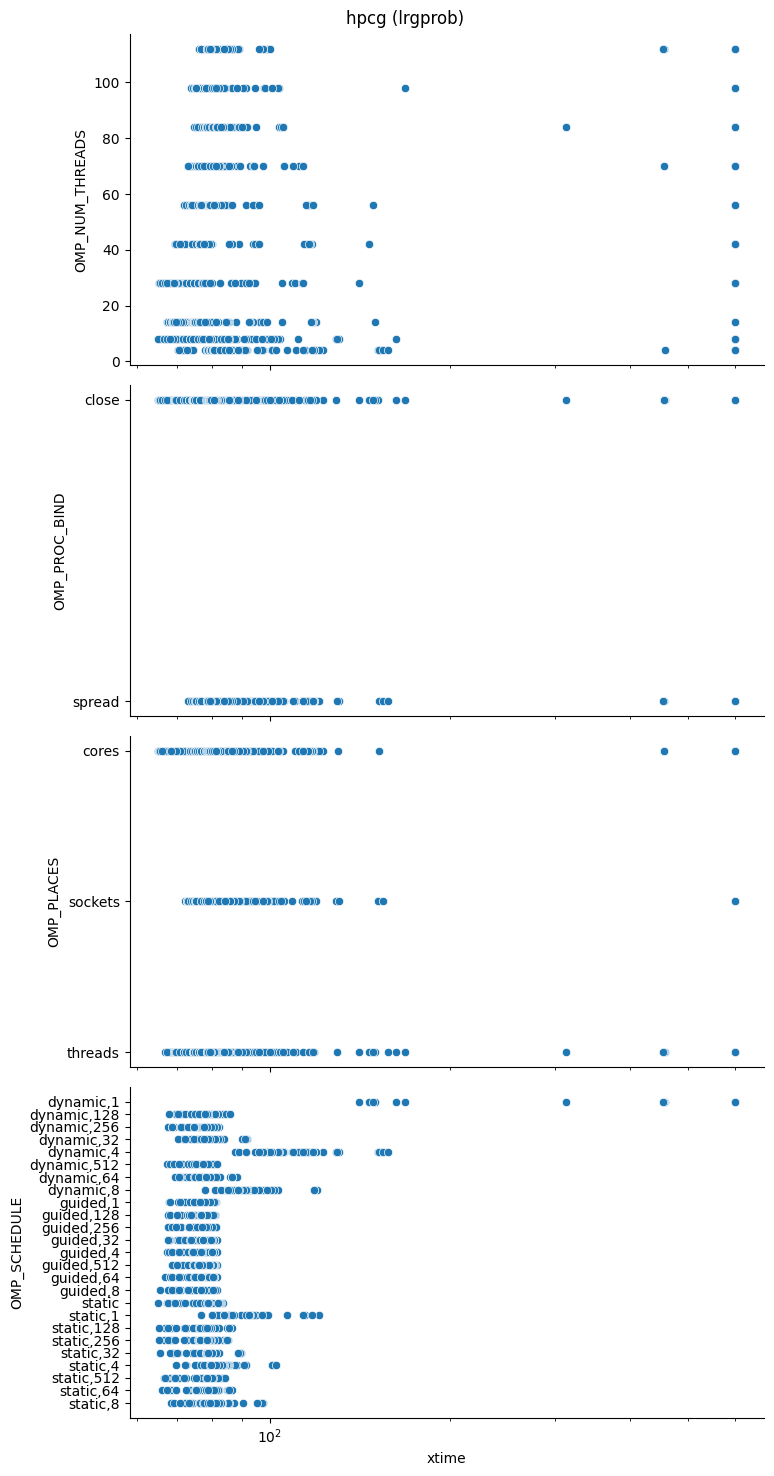

hpcg medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               14         close      cores   static,512  17.178033
1               14         close      cores   static,256  17.187900
2               14         close      cores   static,128  17.238100
3               14         close      cores    static,64  17.324700
4                8         close      cores   static,512  17.342767
5               14         close      cores    static,32  17.440300
6                8         close      cores    guided,32  17.442167
7                8         close      cores     guided,8  17.468400
8                8         close      cores   static,256  17.526733
9               14         close      cores       static  17.562700
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1490               56        spread      cores    dynamic,1   73.670300
1491               56        spread    threads    dynamic,1   75.27240

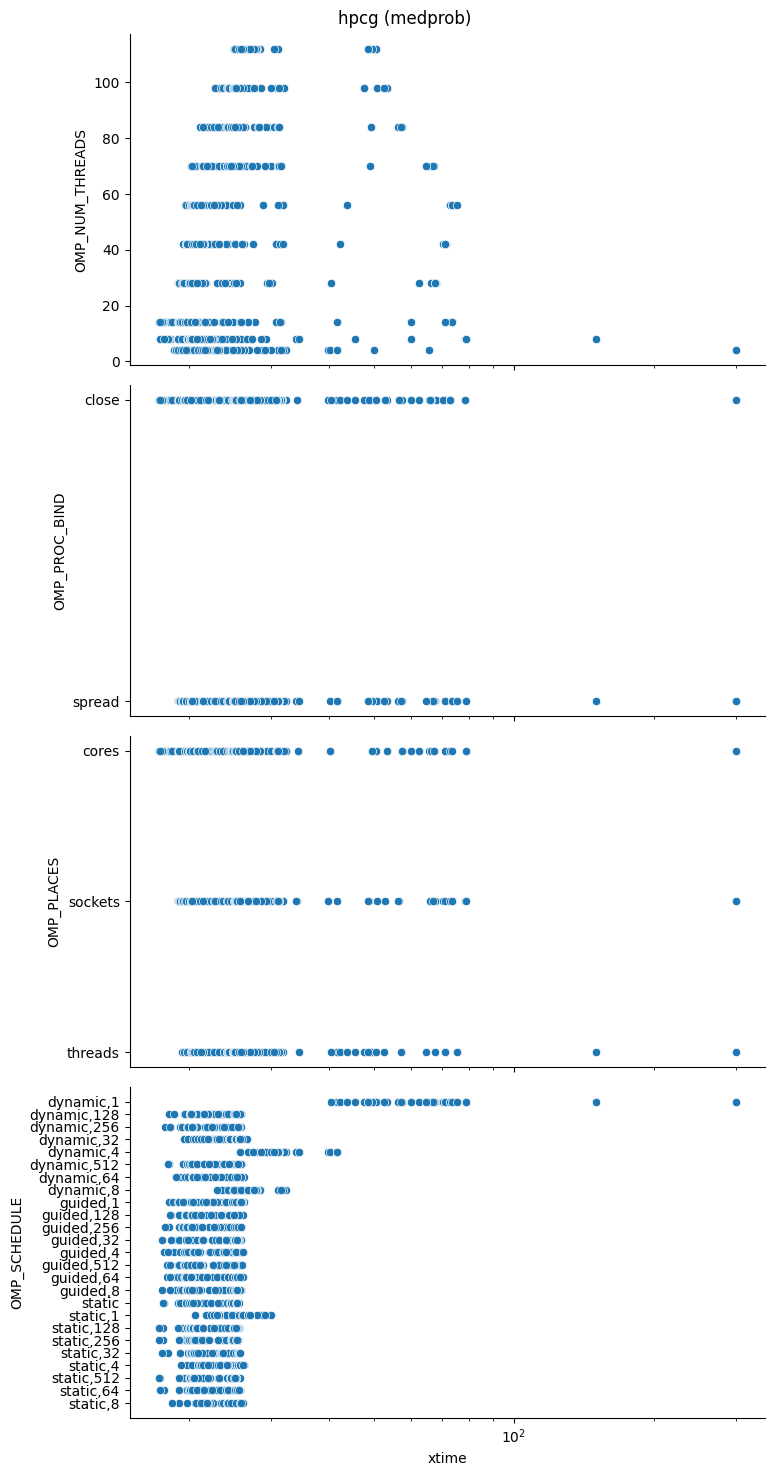

hpcg smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0               28         close    sockets       static  1.949250
1               28        spread    sockets       static  1.949413
2               14        spread    sockets       static  1.951080
3               14         close    sockets       static  1.953187
4               14         close      cores   static,512  1.957727
5               14         close      cores   static,256  1.962937
6               28        spread    threads       static  1.966907
7               14         close      cores   static,128  1.973027
8               14         close      cores    static,64  1.974897
9               28        spread      cores       static  1.976637
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1490               56         close    sockets    dynamic,1   8.947687
1491               56         close      cores    dynamic,1   8.950443
1492        

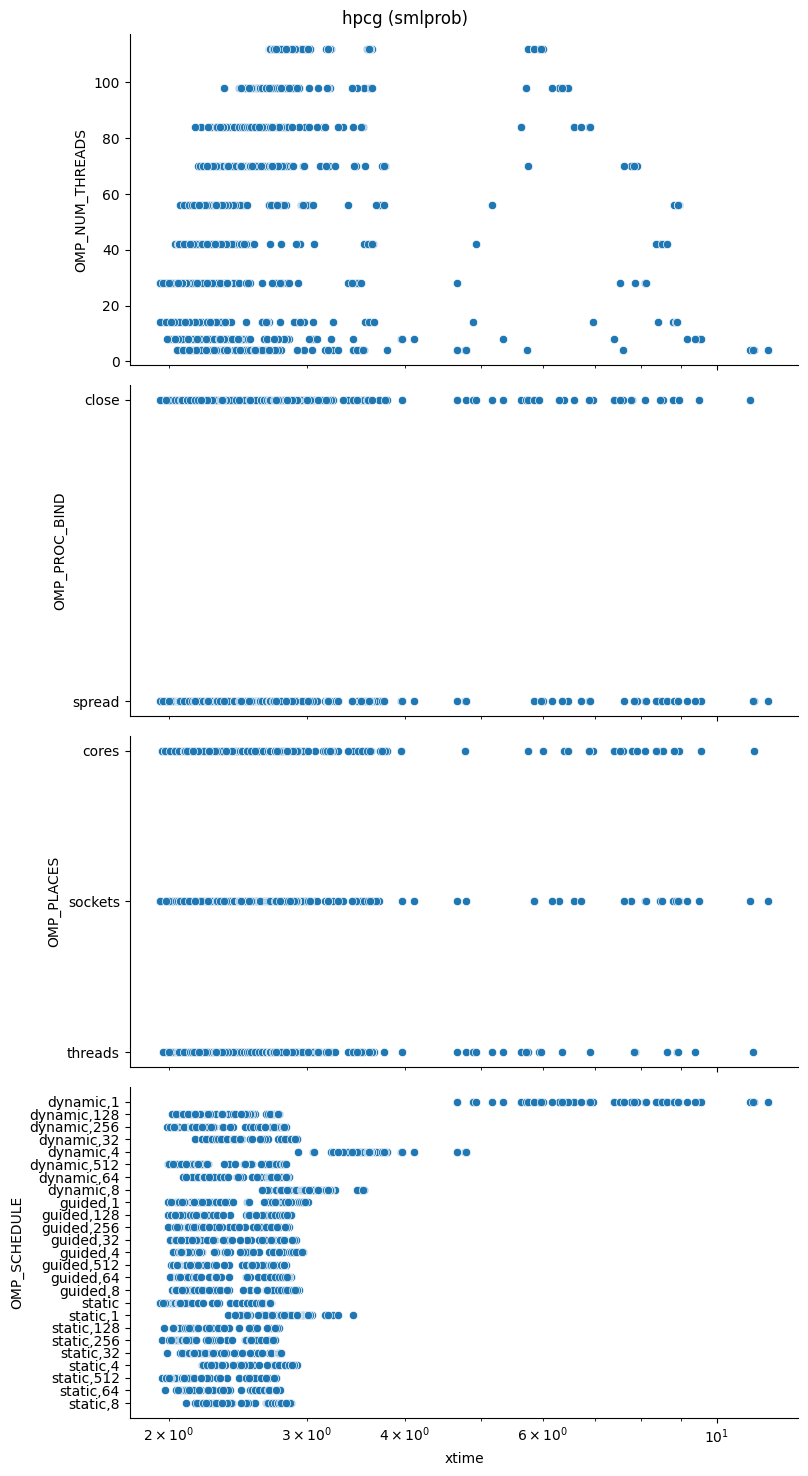

lulesh lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               14         close      cores       static  18.396099
1               28         close      cores       static  19.731596
2               14         close      cores   static,512  19.868238
3               14         close      cores   static,256  20.129333
4               28         close      cores   static,256  20.335244
5               28         close    threads       static  20.378895
6               14         close      cores   guided,512  20.683738
7               28         close      cores   static,512  20.917255
8               14         close      cores  dynamic,512  20.984329
9               14         close      cores   guided,256  21.218824
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1490               98         close    threads    dynamic,1  600.0
1491               28        spread    threads    dynamic,1  600.0
1492       

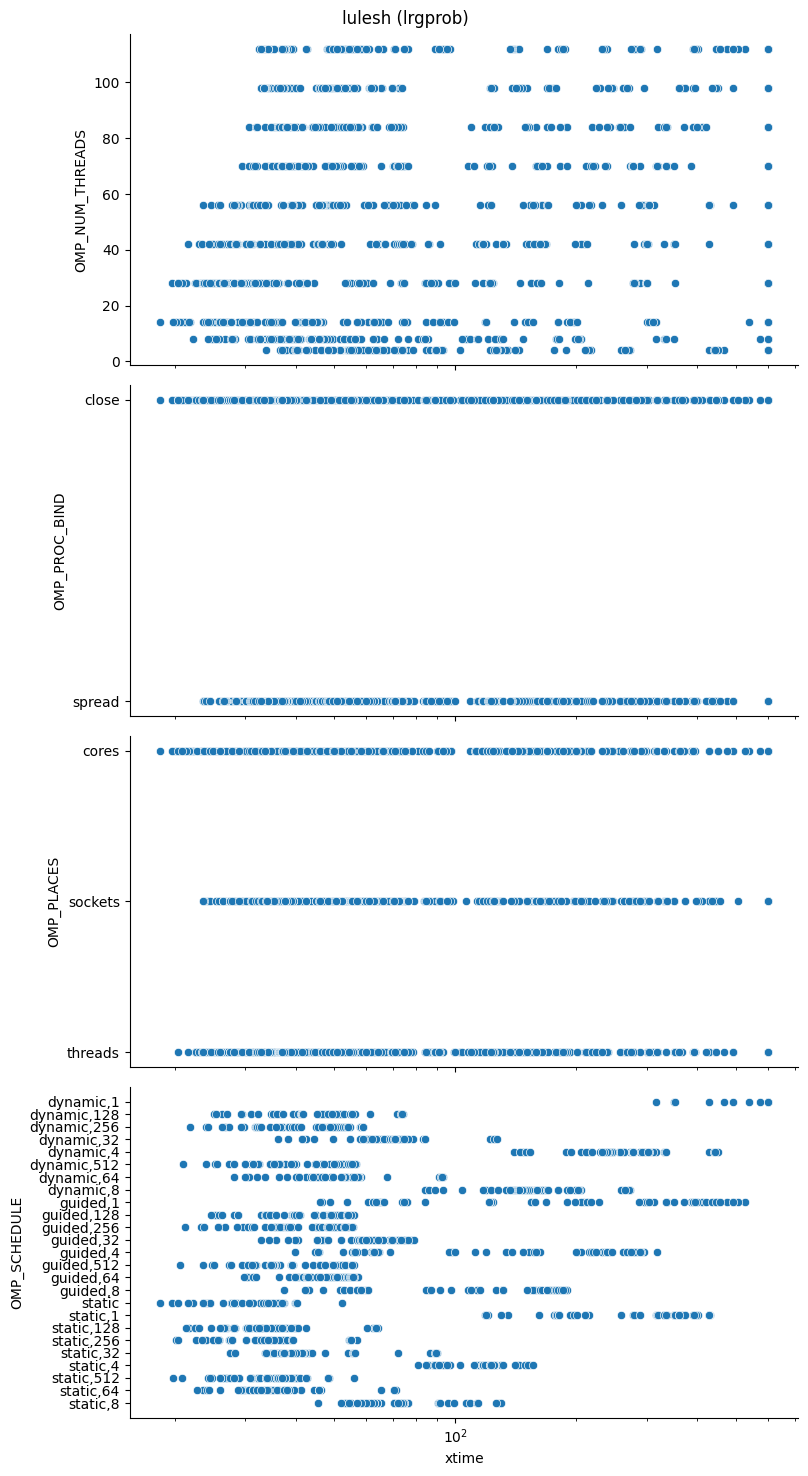

lulesh medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               14         close      cores       static   9.995197
1                8         close      cores       static  10.359149
2               14         close      cores   static,256  10.767768
3               14         close      cores   guided,256  10.975698
4               14         close      cores   static,128  11.044955
5               14         close      cores  dynamic,256  11.157956
6                8         close      cores   static,512  11.284126
7                8         close      cores   static,256  11.362253
8               14         close      cores   guided,512  11.364654
9               14         close      cores   static,512  11.371001
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1490               84        spread    sockets    dynamic,1  300.0
1491               70         close      cores    dynamic,1  300.0
1492       

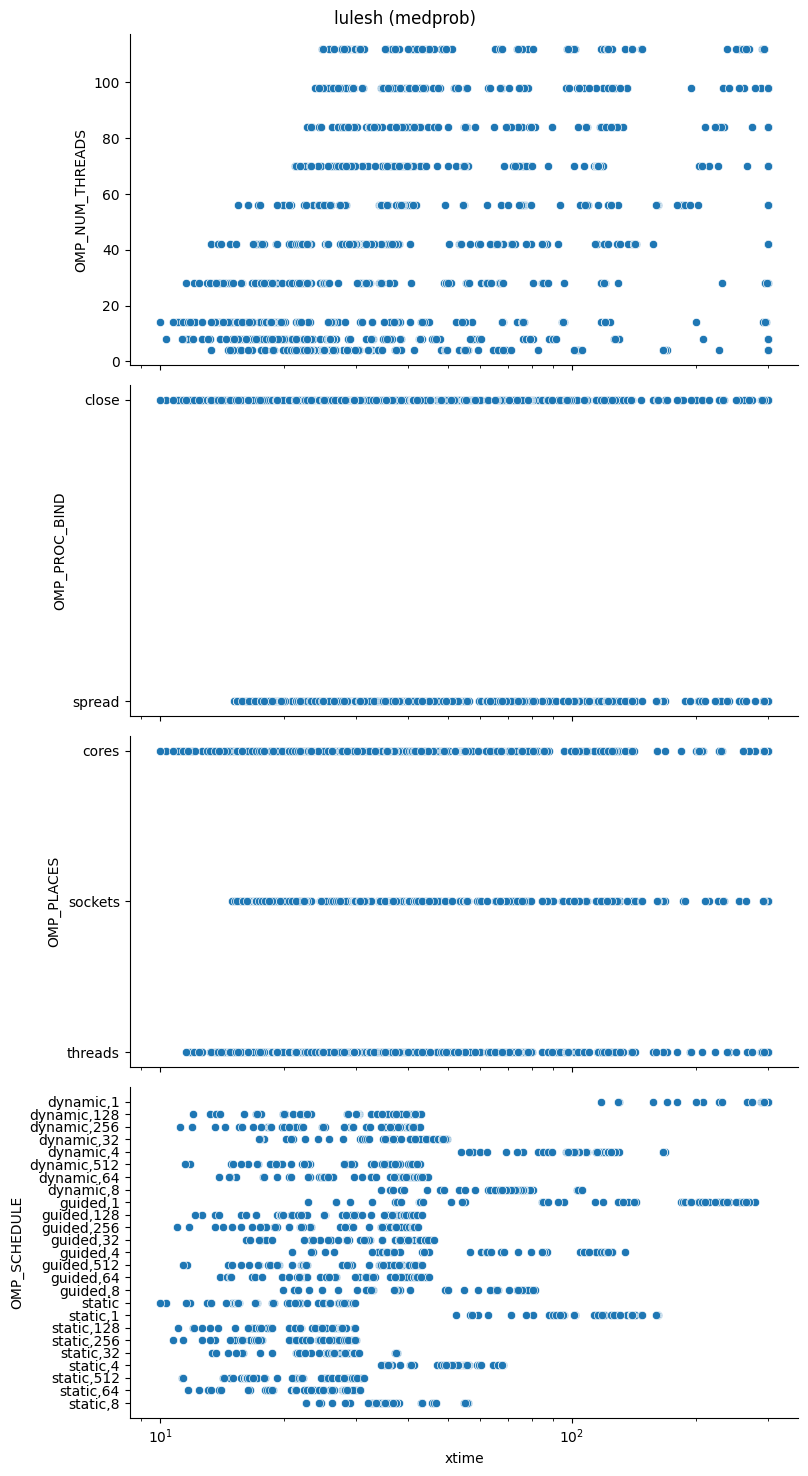

lulesh smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0                4         close      cores       static  4.854440
1                4         close      cores   static,256  4.953367
2                4         close      cores   guided,256  4.972790
3                4         close      cores   static,512  4.973732
4                4         close      cores  dynamic,512  5.008463
5                4         close      cores   static,128  5.125234
6                4         close      cores   guided,512  5.128029
7                4         close      cores  dynamic,256  5.138114
8                8         close      cores   static,256  5.271606
9                4         close      cores   guided,128  5.352658
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1490               70        spread      cores    dynamic,1   92.560724
1491               56         close      cores    dynamic,1   94.355411
1492   

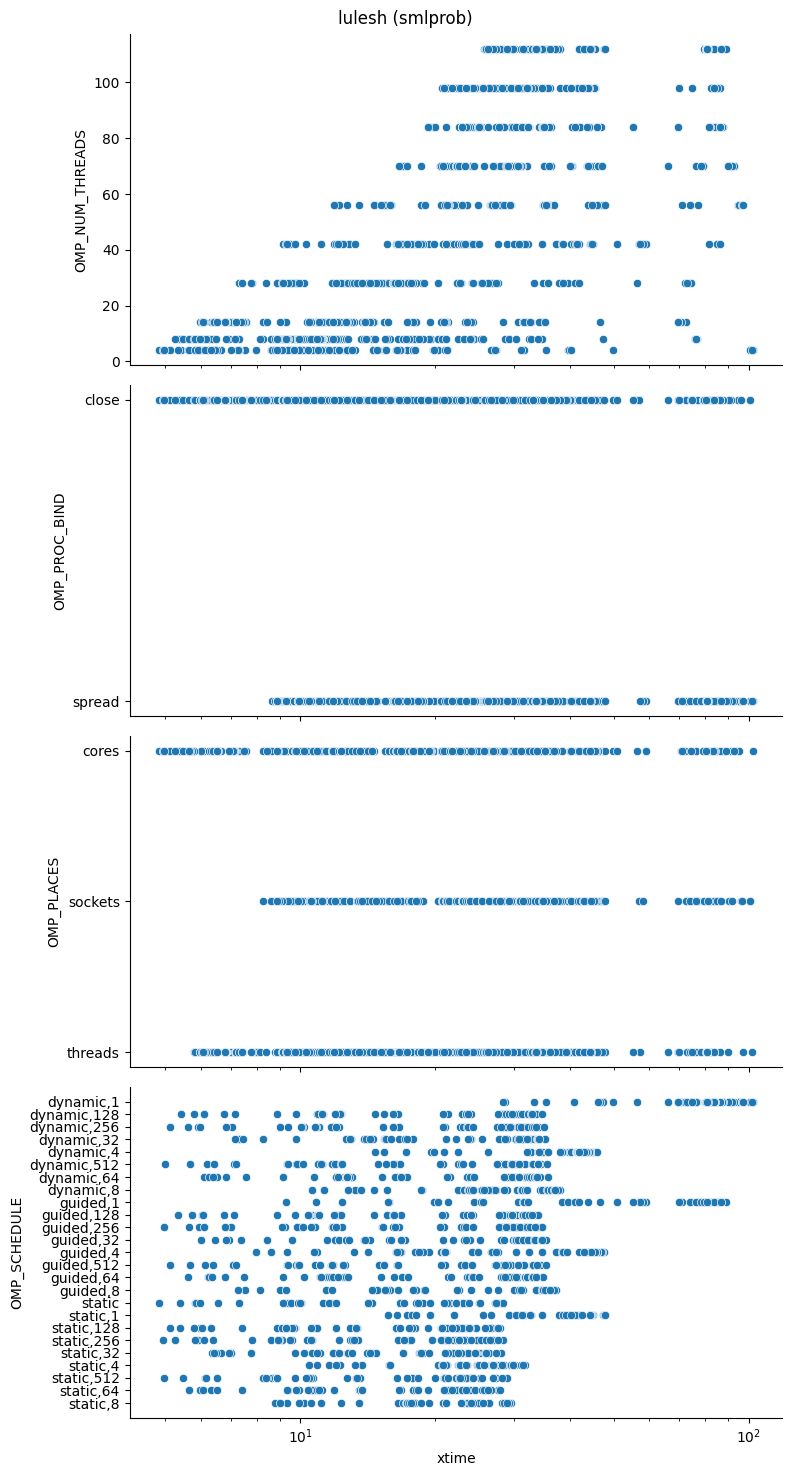

In [4]:
# for each complete run, let's plot the data

for key,values in doneRuns.items():
	progname = values['progname']
	probsize = values['probsize']
	df = values['df'].copy(deep=True)

	# drop any -1 values
	df = df[df['xtime'] != -1.0]

	# drop the progname and probsize columns
	df = df.drop(columns=['progname', 'probsize'])

	#print(df.head(), df.shape)

	hparams = list(df.columns)
	hparams.remove('xtime')

	# average out the xtimes
	avrgd = df.groupby(hparams).mean().reset_index()

	print(progname, probsize)

	# best xtime configs
	bestXtimes = avrgd.sort_values(by=['xtime']).reset_index(drop=True)
	print('best xtimes')
	print(bestXtimes.iloc[:10])

	print('worst xtimes')
	print(bestXtimes.iloc[-10:])

	# print the best static xtimes
	print('best static xtimes')
	print(bestXtimes[bestXtimes['OMP_SCHEDULE'] == 'static'].reset_index(drop=True).iloc[0:4])

	# get the best xtime, pull up it's static result
	print(avrgd[(avrgd['OMP_NUM_THREADS'] == 160) & (avrgd['OMP_SCHEDULE'] == 'static')])

	# let's create multiple 2D plots of the xtimes
	pp = sns.pairplot(avrgd, y_vars=hparams, x_vars=['xtime']) 
	pp.fig.set_size_inches(15,15)
	pp.fig.suptitle(progname+' ('+probsize+')', x=0.7, y=0.999)

	for ax in pp.axes.flat:
		if ax.get_ylabel() in hparams:
			ax.set(xscale='log')

	plt.show()


	
	
